## DataFrame.explode(column, ignore_index=False)


##### The DataFrame.explode() method in pandas is used to transform each element of a list-like to a row, replicating the index values

Parameters:
1. column (required):

Type: str or tuple or list-like of str/tuples (if multi-column support is available in your pandas version)

**The column(s) to explode. Must have list-like elements (e.g., lists, tuples, sets).**

2. ignore_index (optional):  

Type: bool, default False  

If True, the resulting DataFrame will be reindexed (i.e., index will be reset).

If False, the original index values will be retained, which **may result in duplicate index values.**

Here's a fake dataset of 3 job postings.

In [2]:
import pandas as pd
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


If we wanted to analyze the skills in this we'd need a minimum of 5 lines of code to get the counts of skills.

In [3]:
df_skill_lists = df_skills.copy()

for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill] = df_skill_lists['job_skills'].apply(lambda x: skill in x)
        df_skill_lists[skill] = df_skill_lists[skill].astype(int)
        
df_skill_lists.loc['Total'] = df_skill_lists.sum()

df_skill_lists

,job_title_short,job_skills,excel,sql,python,r,aws,airflow
0,Data Analyst,"[excel, sql, python]",1,1,1,0,0,0
1,Data Scientist,"[python, r]",0,0,1,1,0,0
2,Data Engineer,"[aws, python, airflow]",0,0,1,0,1,1
Total,Data AnalystData ScientistData Engineer,"[excel, sql, python, python, r, aws, python, a...",1,1,3,1,1,1


However, exploding it out makes the data a lot easier to work with.

In [4]:
df_exploded = df_skills.explode('job_skills')

df_exploded

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


In [6]:
df_skills.explode('job_skills').value_counts('job_skills')

job_skills
python     3
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

In [10]:
# import libraries
import pandas as pd
import ast

#import data
df=pd.read_csv('/Users/abby/Python_data_project/2_Advanced/data_jobs.csv')

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
# Convert string representation to actual list, checking for NaN values first
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df[['job_title_short','job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,NaN
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [11]:
df.explode('job_skills').head()

# in job_skills column, one cell only has one skill


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


<Axes: xlabel='job_skills'>

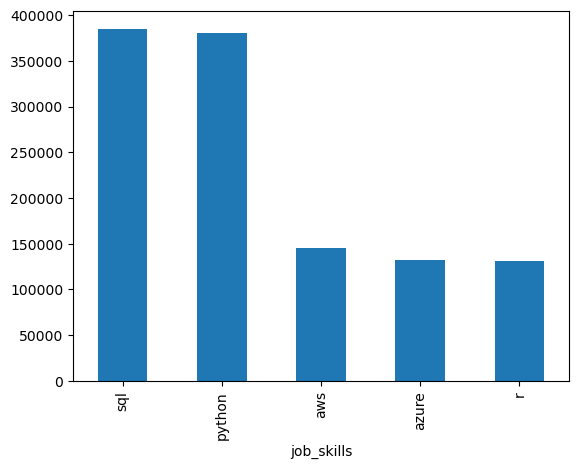

In [15]:
df_exploded = df.explode('job_skills')
df_exploded['job_skills'].value_counts().head().plot(kind='bar')

In [16]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [18]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count',ascending=False)
df_skills_count 

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


Get the top 10 skills for data analyst

<Axes: ylabel='job_skills'>

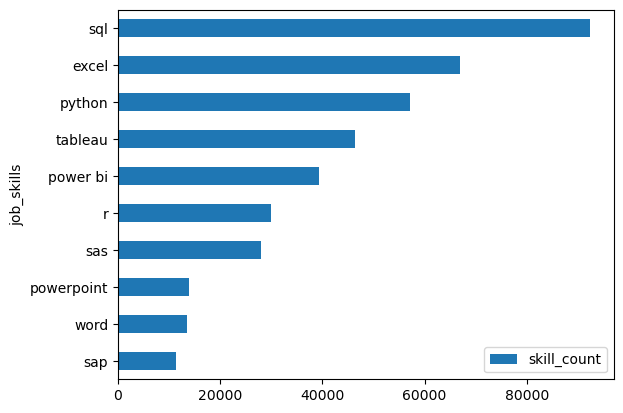

In [24]:
job_title='Data Analyst'
top_skills=10

df_skill_da=df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills)

df_skill_da=df_skill_da.sort_values(by='skill_count')

df_skill_da.plot(kind='barh',x='job_skills',y='skill_count')

## plt.gca().invert_yaxis()
- plt.gca() means "get current axes" — it returns the current Axes object.
- .invert_yaxis() is a method on an Axes object that flips the y-axis.

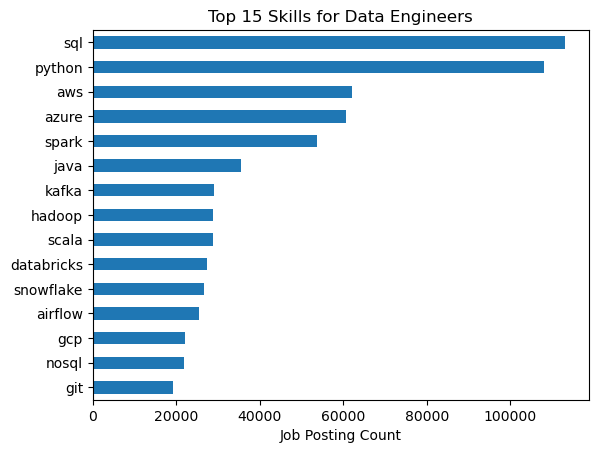

In [33]:
import matplotlib.pyplot as plt

job_title='Data Engineer'
top_skills=15

df_skill_de=df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills)

df_skill_de.plot(kind='barh',x='job_skills',y='skill_count')

plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.ylabel('')
plt.xlabel('Job Posting Count')
plt.legend().set_visible(False) # remove the legend

plt.show()


## Investigate Trending Skills

In [55]:
# import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt

#import data
df=pd.read_csv('/Users/abby/Python_data_project/2_Advanced/data_jobs.csv')

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
# Convert string representation to actual list, checking for NaN values first
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

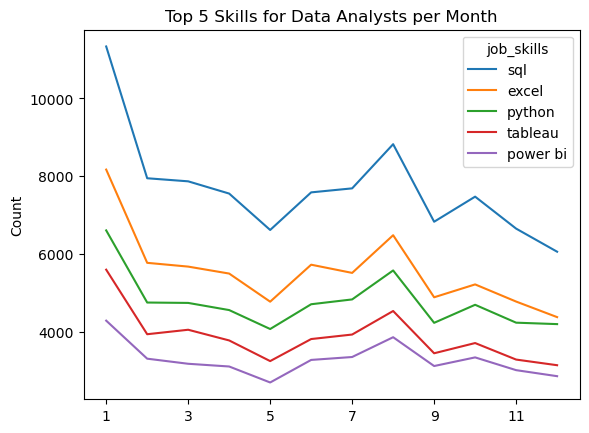

In [56]:
df_DA = df[df['job_title_short']=='Data Analyst'].copy()
df_DA['job_posted_month_num']=df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_num',columns='job_skills',aggfunc='size',fill_value=0)

# create a new row to calculate the total
df_DA_pivot.loc['Total']=df_DA_pivot.sum()

# sort the value by total
Skills_in_order=df_DA_pivot.loc['Total'].sort_values(ascending=False).index
# Skills_in_order is now a list of skill column names sorted from most to least popular.

# Need the pivot table to display the columns in this order
df_DA_pivot= df_DA_pivot[Skills_in_order]

# Drop the row which count the total num
df_DA_pivot = df_DA_pivot.drop('Total')

# only include the top 5 skills
df_DA_pivot.iloc[:,:5].plot(kind='line')
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()


#### In pivot table, the column at position 0 is Sql, not the index job_posted_month_num

<df_DA_pivot.loc['Total'] = df_DA_pivot.sum()>
1. 'Total' is the row label you want to create or access.
2. Here, you are creating a new row named 'Total' in df_DA_pivot.
3. The right side df_DA_pivot.sum() calculates the sum of each column (by default, sums down the rows).
4. This sum is assigned as the values for the new 'Total' row.

<df.loc[row_label, column_label]>
- You can use it to select rows and columns by their labels.
- If you provide only one label like df.loc[row_label], it selects the entire row with that label.
- You can also assign new values to a row or column using .loc.

##### The pivot_table function itself **doesn’t** have a parameter to **specify column order**

#### How to reorder columns after creating the pivot table:

1. Create the pivot table normally, for example:

<df_pivot = df.pivot_table(index='month', columns='skill', aggfunc='size', fill_value=0)>

2. Reorder columns by passing a list of columns in the desired order:

<desired_order = ['python', 'sql', 'excel', 'tableau', 'power bi']  
df_pivot = df_pivot[desired_order]>

- This will reorder the columns of the pivot table according to your list.  

- Make sure all the columns in your list exist in the DataFrame; otherwise, pandas will raise a KeyError.

## Practice 1. Bar Plot of Top Skills for Cloud Engineer

Using the ast library, clean up the job_skills column to be of the list data type in preparation for exploding this column.

Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.

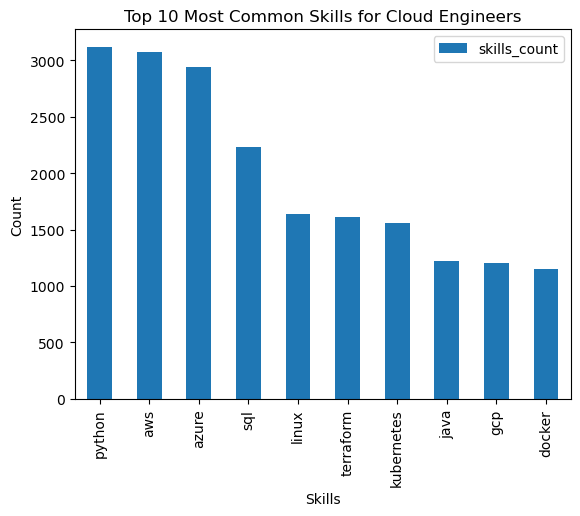

In [63]:
# import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt

#import data
df=pd.read_csv('/Users/abby/Python_data_project/2_Advanced/data_jobs.csv')

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
# Convert string representation to actual list, checking for NaN values first
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# filter df for jobs of Cloud Engineer
df_ce = df[df['job_title_short']=='Cloud Engineer'].copy()

# explode job_skills column
df_explode = df_ce.explode('job_skills')

# calculate the count of each skills
df_count= df_explode.groupby('job_skills').size().sort_values(ascending=False)
df_count=df_count.reset_index(name='skills_count')
# or just df_count= df_explode['job_skills'].value_counts()

# create bar chart for top 10 most common skills
df_count.head(10).plot(kind='bar',x='job_skills',y='skills_count')


plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.show()

## Practice 2. Average Salary by Skill

Explode the job_skills column in the DataFrame and calculate the average salary for each skill. Display the top 5 skills with the highest average salary.

In [66]:
# import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt

#import data
df=pd.read_csv('/Users/abby/Python_data_project/2_Advanced/data_jobs.csv')

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
# Convert string representation to actual list, checking for NaN values first
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_explode = df.explode('job_skills')
df_skill_avg = df_explode.groupby('job_skills')['salary_year_avg'].mean().reset_index()
df_skill = df_skill_avg.sort_values(by='salary_year_avg',ascending=False).head()
df_skill

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


| Concept      | Explanation                                                           |
| ------------ | --------------------------------------------------------------------- |
| `groupby()`  | Groups rows based on one or more columns                              |
| Result index | By default, the group key(s) become the **index** of the result       |
| How to reset | Use `.reset_index()` if you want to turn the index back into a column |

except the keys: 
- one column: then it's a series
- more than one column: then it's a dataframe

## Practice 3. Unique Skills Count

Calculate the number of unique skills required for each job_title_short.

- Explode the job_skills column

- Group by job_title_short

- Count unique skills per title (i.e., num_unique_skills)

- Rename the result column to num_unique_skills and show the first 5 rows

In [72]:
# import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt

#import data
df=pd.read_csv('/Users/abby/Python_data_project/2_Advanced/data_jobs.csv')

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
# Convert string representation to actual list, checking for NaN values first
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_explode = df.explode('job_skills')

df_unique = df_explode.groupby('job_title_short')['job_skills'].nunique().reset_index(name='num_unique_skills')

df_unique.head()


,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237


| Method       | What it returns                           |
| ------------ | ----------------------------------------- |
| `.unique()`  | Array of unique values per group          |
| `.nunique()` | Number (count) of unique values per group |
